<a href="https://colab.research.google.com/github/UsmanHaziq/CASE--I-Lungs-cancer/blob/main/SCNN-UPDATED-TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Load the data
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Train",
    image_size=(32, 32),
    batch_size=32
)

Found 357 files belonging to 3 classes.


In [33]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Val",
    image_size=(32, 32),
    batch_size=32
)

Found 77 files belonging to 3 classes.


In [34]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Test",
    image_size=(32, 32),
    batch_size=32
)


Found 76 files belonging to 3 classes.


In [35]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break


(32, 32, 32, 3)


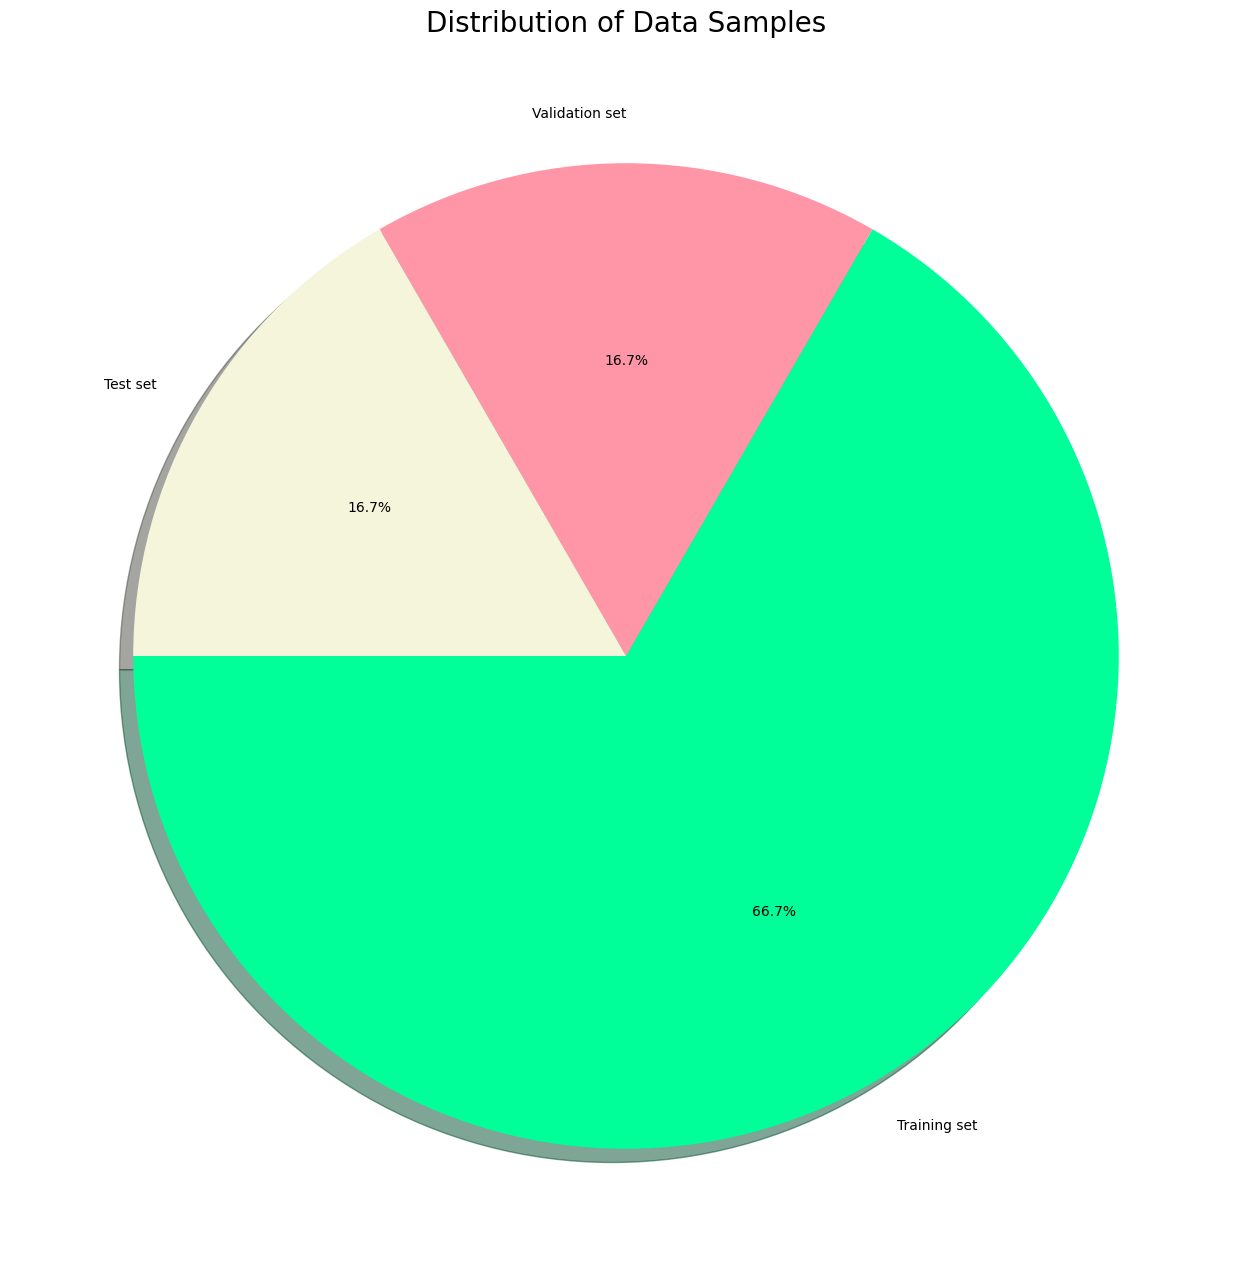

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()


In [37]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [38]:
from tensorflow.keras.applications import InceptionV3
IMAGE_SIZE = [224, 224]

!pip install tensorflow
import tensorflow as tf
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [39]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
model = keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),  # Add an additional Conv2D layer
    MaxPooling2D((2, 2)),  # Add an additional MaxPooling2D layer


    Flatten(),
    Dense(256, activation="relu"),
    Dense(3, activation="Softmax")
])
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_189 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_190 (Conv2D)         (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 2, 2, 128)         0

In [41]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [42]:

import time
start_time=time.time()
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=60,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)
end_time=time.time()
elapsed_time=end_time=start_time
print(f"Elapsed time: {elapsed_time} seconds")


Epoch 1/60
12/12 [==============================] - 24s 1s/step - loss: 41.5171 - accuracy: 0.3782 - val_loss: 16.8291 - val_accuracy: 0.3247
Epoch 2/60
12/12 [==============================] - 3s 99ms/step - loss: 8.6445 - accuracy: 0.4342 - val_loss: 1.1656 - val_accuracy: 0.5974
Epoch 3/60
12/12 [==============================] - 2s 52ms/step - loss: 0.8525 - accuracy: 0.6667 - val_loss: 0.4666 - val_accuracy: 0.7273
Epoch 4/60
12/12 [==============================] - 1s 52ms/step - loss: 0.5642 - accuracy: 0.7227 - val_loss: 0.7988 - val_accuracy: 0.6494
Epoch 5/60
12/12 [==============================] - 1s 53ms/step - loss: 0.6518 - accuracy: 0.6947 - val_loss: 0.5353 - val_accuracy: 0.7143
Epoch 6/60
12/12 [==============================] - 1s 48ms/step - loss: 0.5977 - accuracy: 0.7031 - val_loss: 0.4575 - val_accuracy: 0.7273
Epoch 7/60
12/12 [==============================] - 2s 92ms/step - loss: 0.5510 - accuracy: 0.7115 - val_loss: 0.3899 - val_accuracy: 0.7922
Epoch 8/60
1

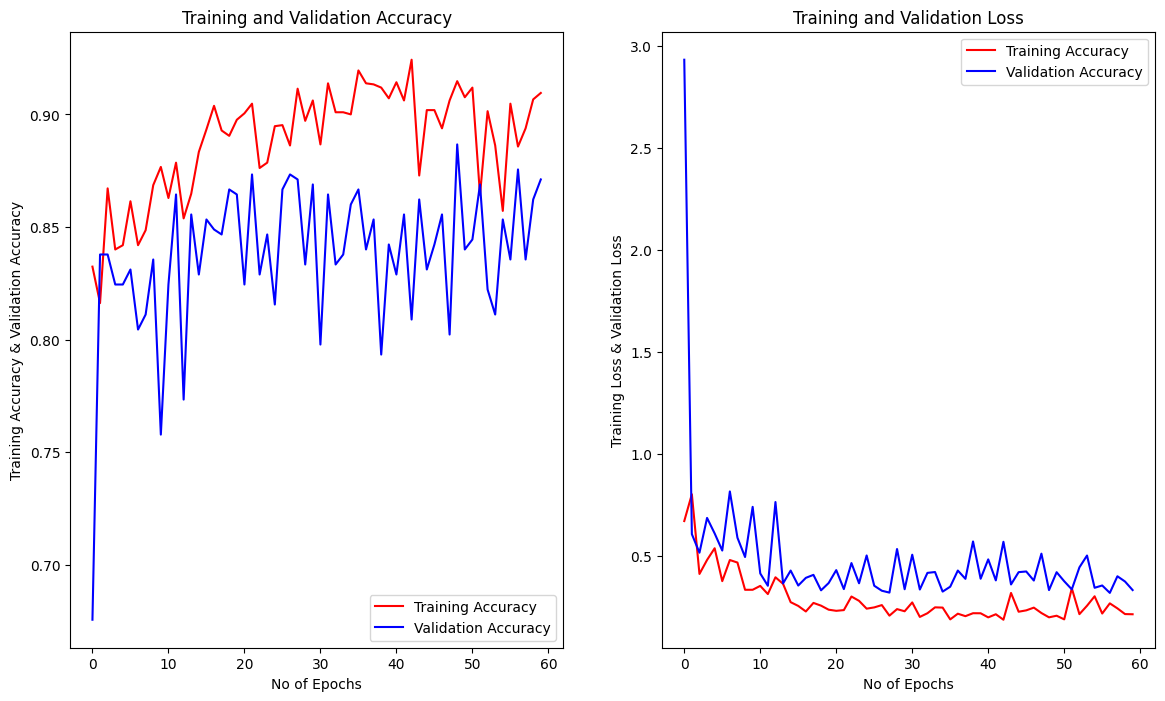

In [18]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

66/66 [==============================] - 11s 146ms/step - loss: 0.1617 - accuracy: 0.9295


92.95238256454468

In [20]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

15/15 [==============================] - 4s 130ms/step - loss: 0.3345 - accuracy: 0.8711


87.11110949516296

In [21]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

15/15 [==============================] - 60s 2s/step - loss: 0.2982 - accuracy: 0.8933


89.33333158493042

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: benign
1/1 [==============================] - 0s 34ms/step
predicted label: adenocarcinoma


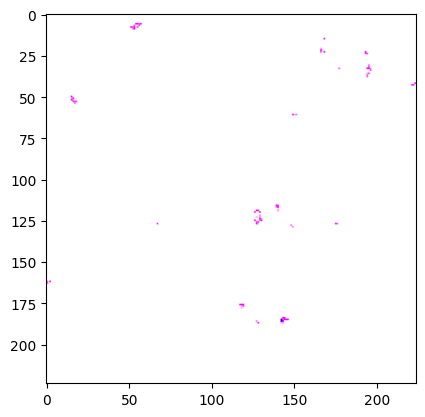

In [25]:
import numpy as np
for images_batch, labels_batch in test_set:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


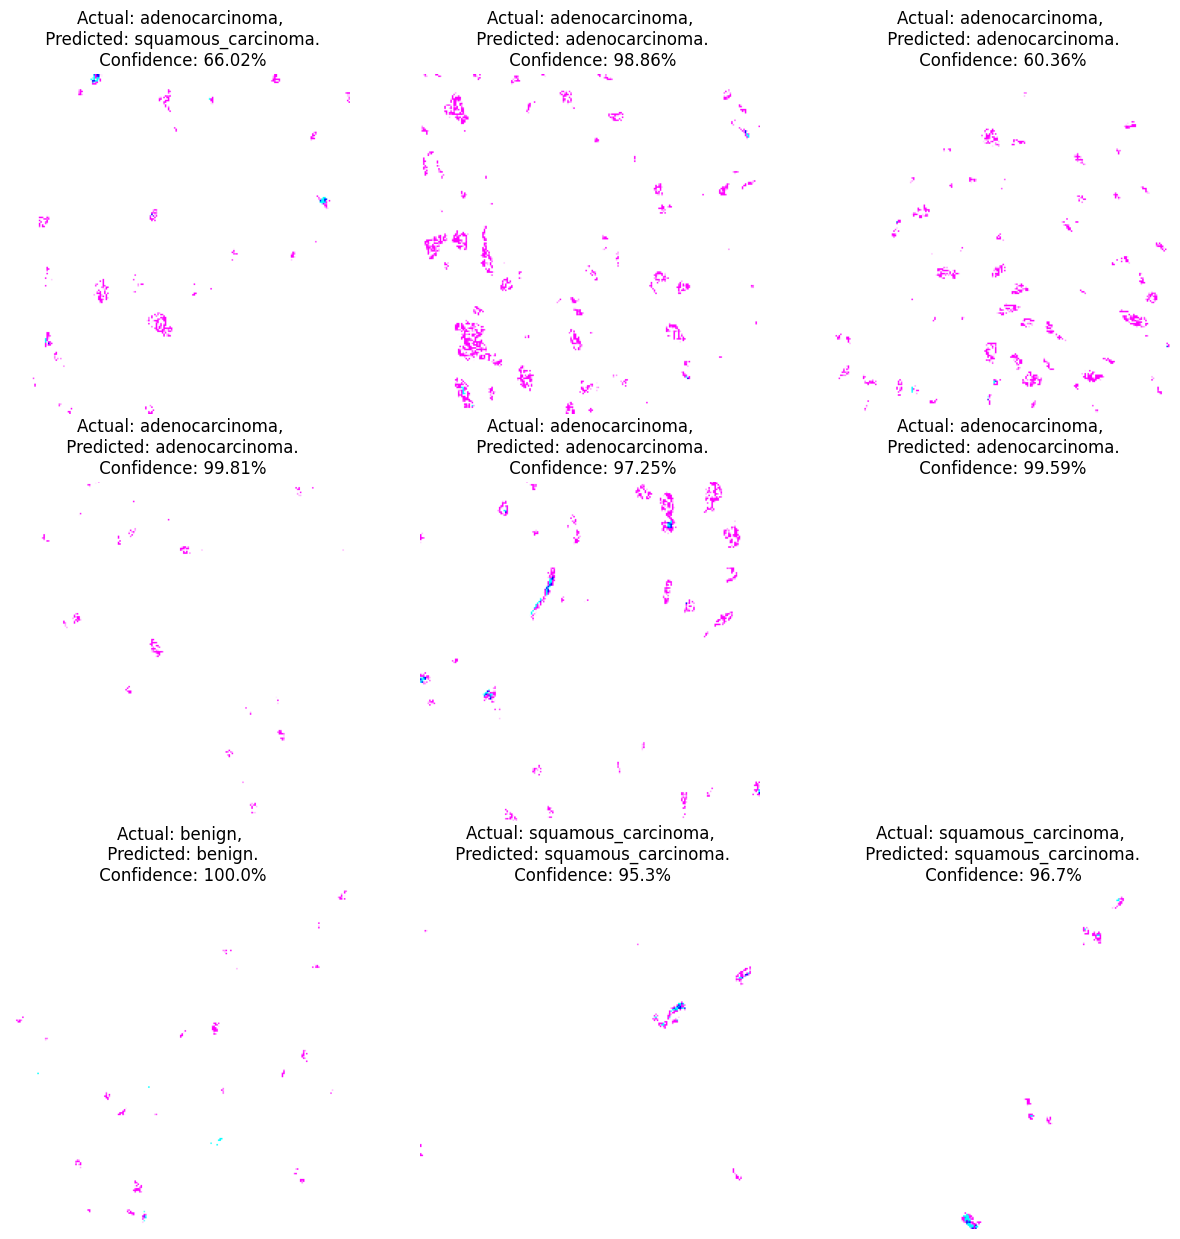

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

Generating predictions...
4/4 [==============================] - 0s 90ms/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.77      0.83      0.80        41
            benign       0.96      0.98      0.97        44
squamous_carcinoma       0.85      0.77      0.80        43

          accuracy                           0.86       128
         macro avg       0.86      0.86      0.86       128
      weighted avg       0.86      0.86      0.86       128

Generating confusion matrix...


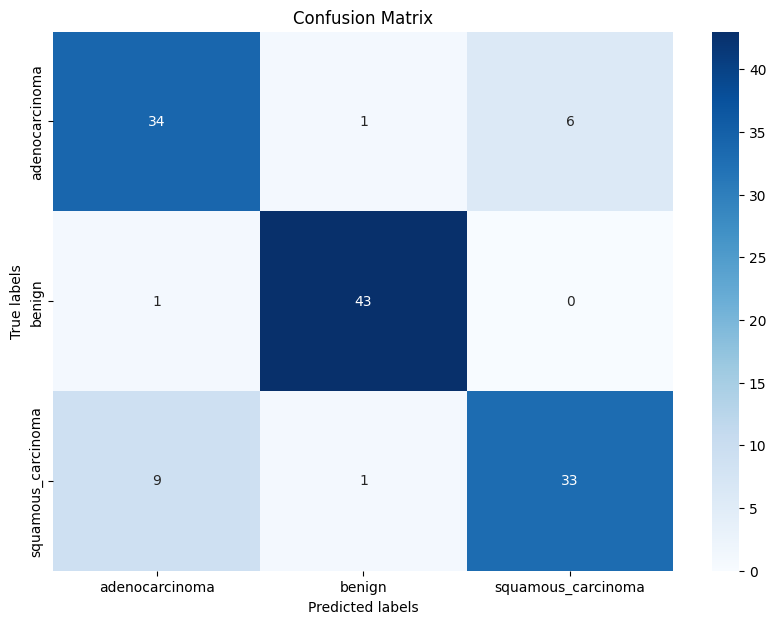

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()